In [1]:
pip install ctgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance

from scipy.linalg import cholesky, det
import seaborn as sns
import matplotlib.pyplot as plt

seed = 1
np.random.seed(seed)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.inspection import permutation_importance
from scipy.linalg import cholesky, det
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/MyDrive/VIP - Synthetic Patient Models and Data-20221105T222810Z-001/VIP - Synthetic Patient Models and Data/pima_diabetes.csv"
real_data = pd.read_csv(data_path)
print(real_data.head(5))
real_data = real_data[real_data.Insulin!=0]
#print(real_data.head(5))
from ctgan import CTGAN
# Identifies all the discrete columns
discrete_columns = ['Pregnancies',
                   'Glucose',
                   'BloodPressure',
                   'SkinThickness',
                   'Insulin',
                   'BMI',
                   'DiabetesPedigreeFunction',
                   'Age',
                   'Outcome'
                   ]
# Initiates the CTGANSynthesizer and call its fit method to pass in the table

ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)
#generate synthetic data, 1000 rows of data

synthetic_data = ctgan.sample(1000)
print(synthetic_data.head(5))
# Get features by dropping the target Outcome column
X = synthetic_data.drop(columns="Outcome")
# Get labels from the Outcome column
y = synthetic_data.Outcome

# Split features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
# Use DecisionTreeClassifier for classification
clf = DecisionTreeClassifier(random_state=seed)

clf.fit(X_train, y_train)
print(f"Accuracy: {clf.score(X_test, y_test):.3f}")
print(f"F1 score: {f1_score(y_test, clf.predict(X_test)):.3f}")
print(permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=seed).importances_mean)

MessageError: ignored

In [ ]:
pip install table-evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  


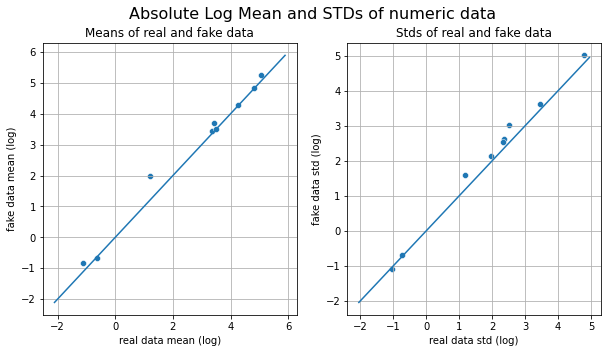

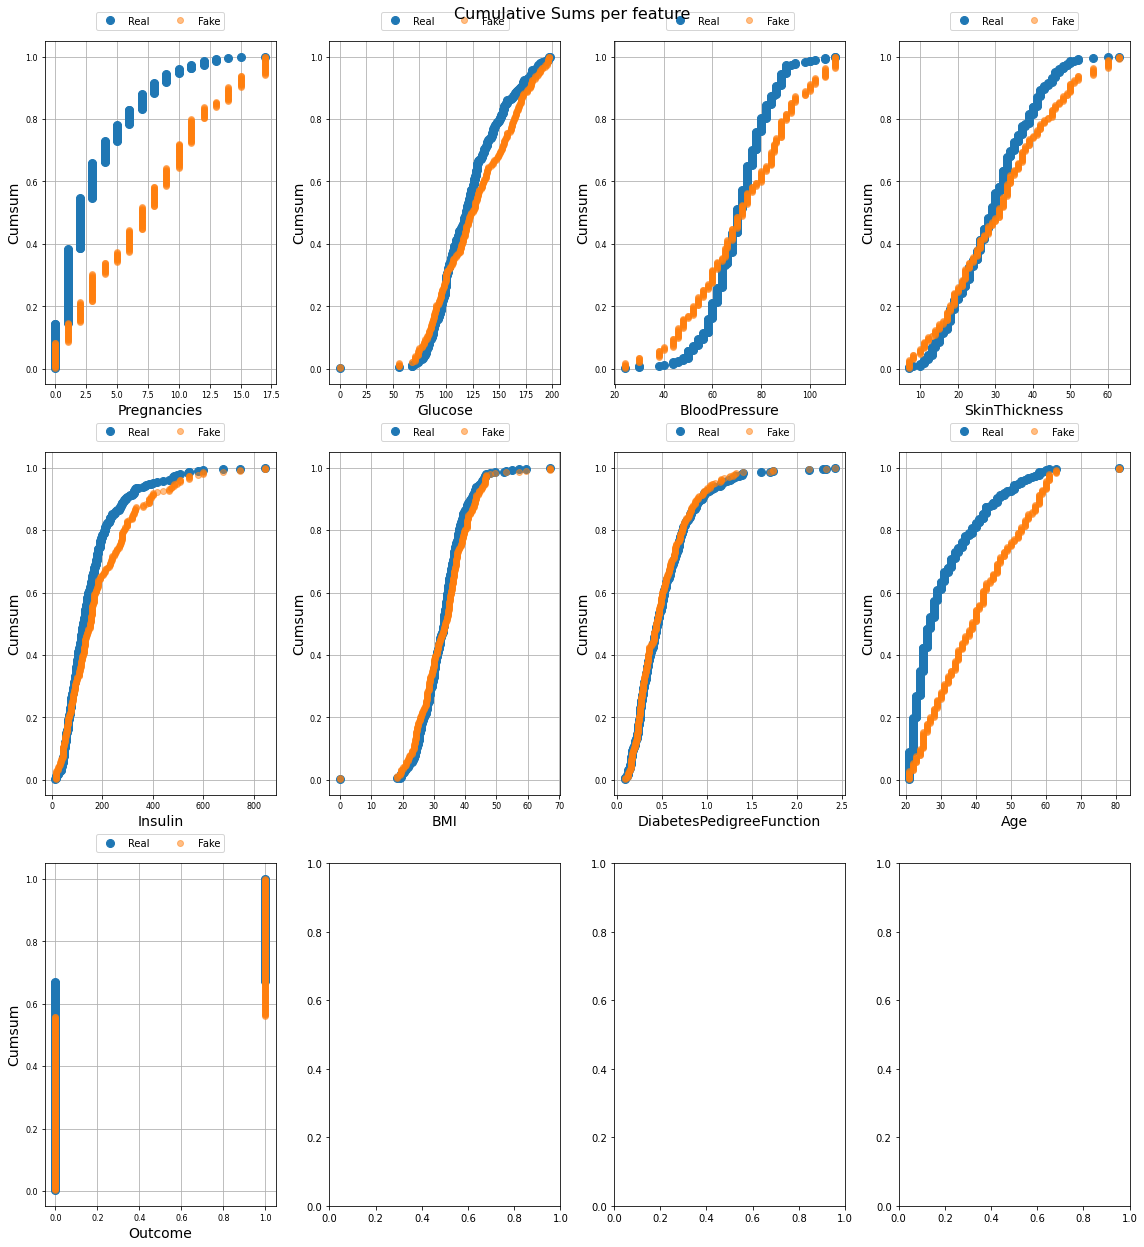

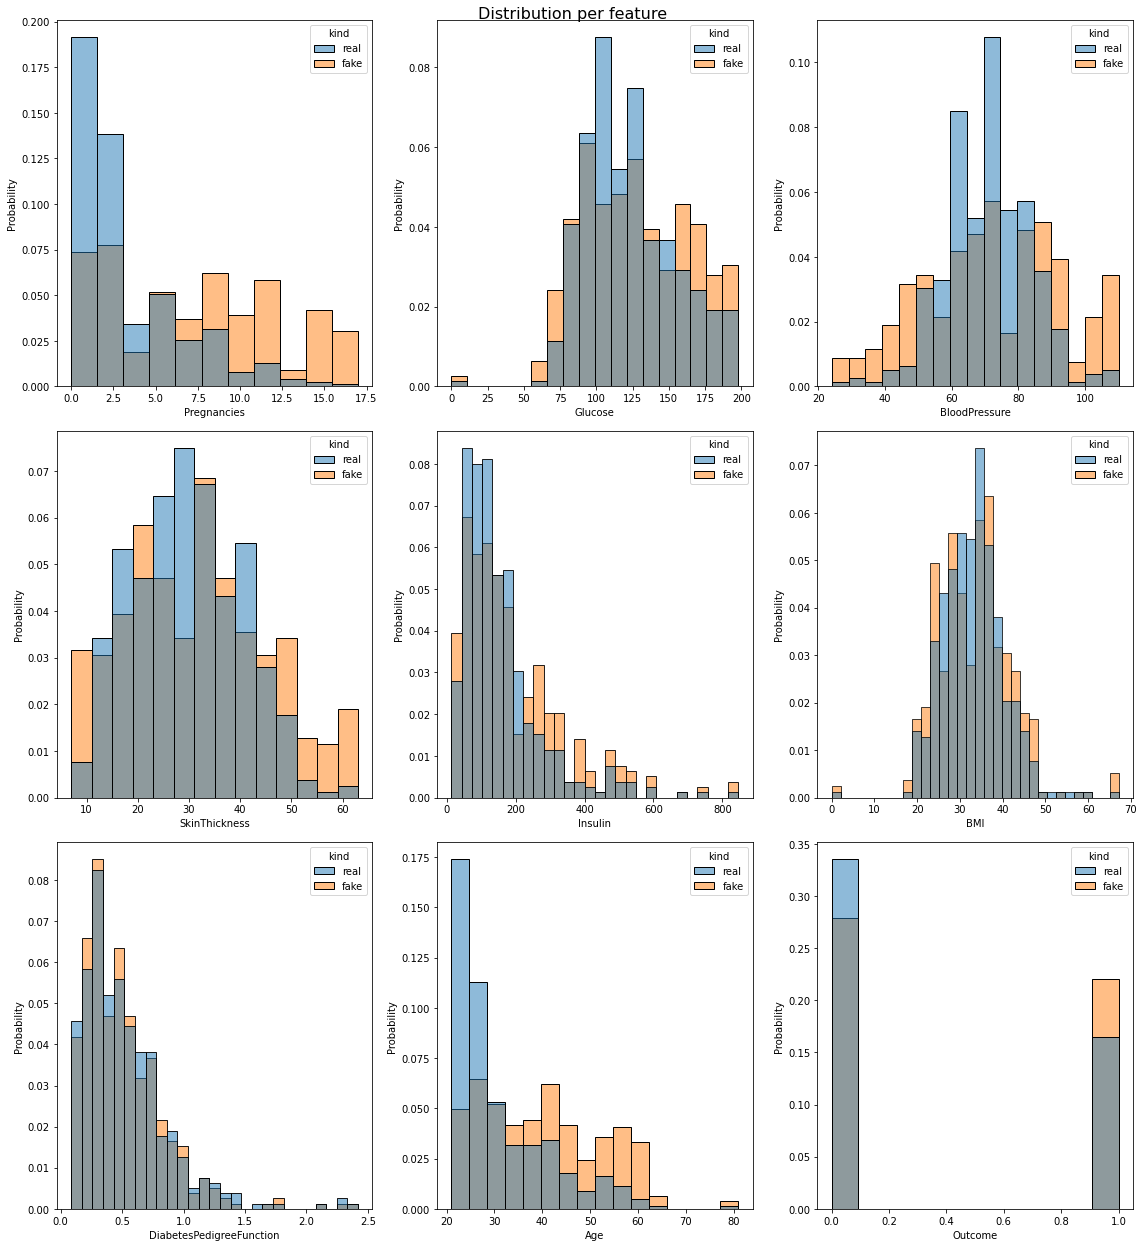

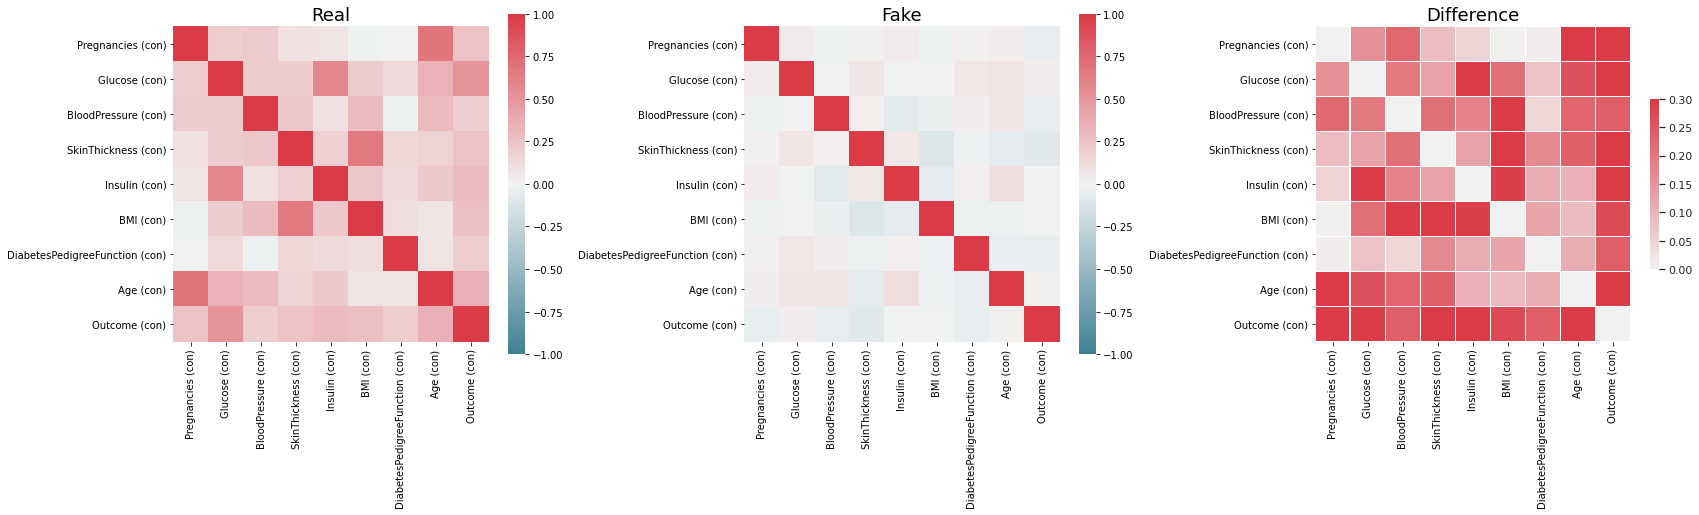

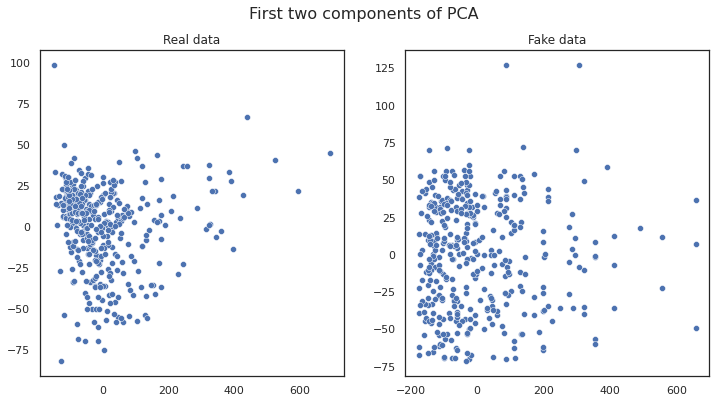

In [ ]:
from table_evaluator import load_data, TableEvaluator
print(real_data.head(5))
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
# Get features by dropping the target Outcome column
X = synthetic_data.drop(columns="Outcome")
# Get labels from the Outcome column
y = synthetic_data.Outcome

# Split features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
# Use DecisionTreeClassifier for classification
clf = DecisionTreeClassifier(random_state=seed)

clf.fit(X_train, y_train)
print(f"Accuracy: {clf.score(X_test, y_test):.3f}")
print(f"F1 score: {f1_score(y_test, clf.predict(X_test)):.3f}")
print(permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=seed).importances_mean)

Accuracy: 0.528
F1 score: 0.449
[-0.0192 -0.0088 -0.0144  0.0232 -0.0112  0.0028 -0.006   0.0032]


In [ ]:
data_path = "/content/gdrive/MyDrive/VIP - Synthetic Patient Models and Data-20221105T222810Z-001/VIP - Synthetic Patient Models and Data/scikitLearn.csv"
real_data = pd.read_csv(data_path)
print(real_data.head(5))
from ctgan import CTGAN
discrete_columns = ['AGE',
                   'SEX',
                   'BMI',
                   'BP',
                   'S1',
                   'S2',
                   'S3',
                   'S4',
                   'S5',
                   'S6',
                    'Y'

                   ]
ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)
synthetic_data = ctgan.sample(1000)
print(synthetic_data.head(5))



   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
   AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6    Y
0   33    1  27.0  122.00  189  156.4  36.0  7.00  5.1533   88  164
1   44    2  26.3   65.33  137   87.6  36.0  5.05  5.3423   92   78
2   25    2  30.4  100.00  225   71.0  39.0  4.15  5.1120   91   88
3   35    2  21.7  110.67  238  174.2  37.0  6.24  5.1299  122   66
4   69    2  32.1   84.00  147  196.8  25.0  4.79  4.3438   91  111


   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


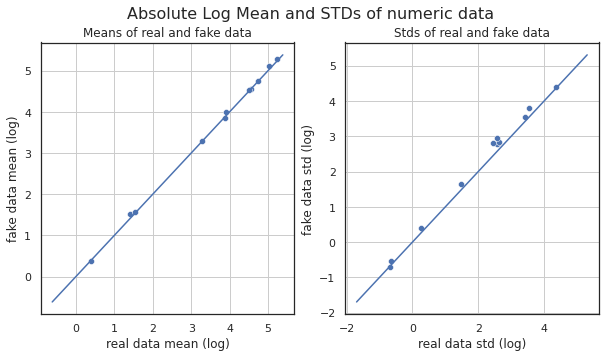

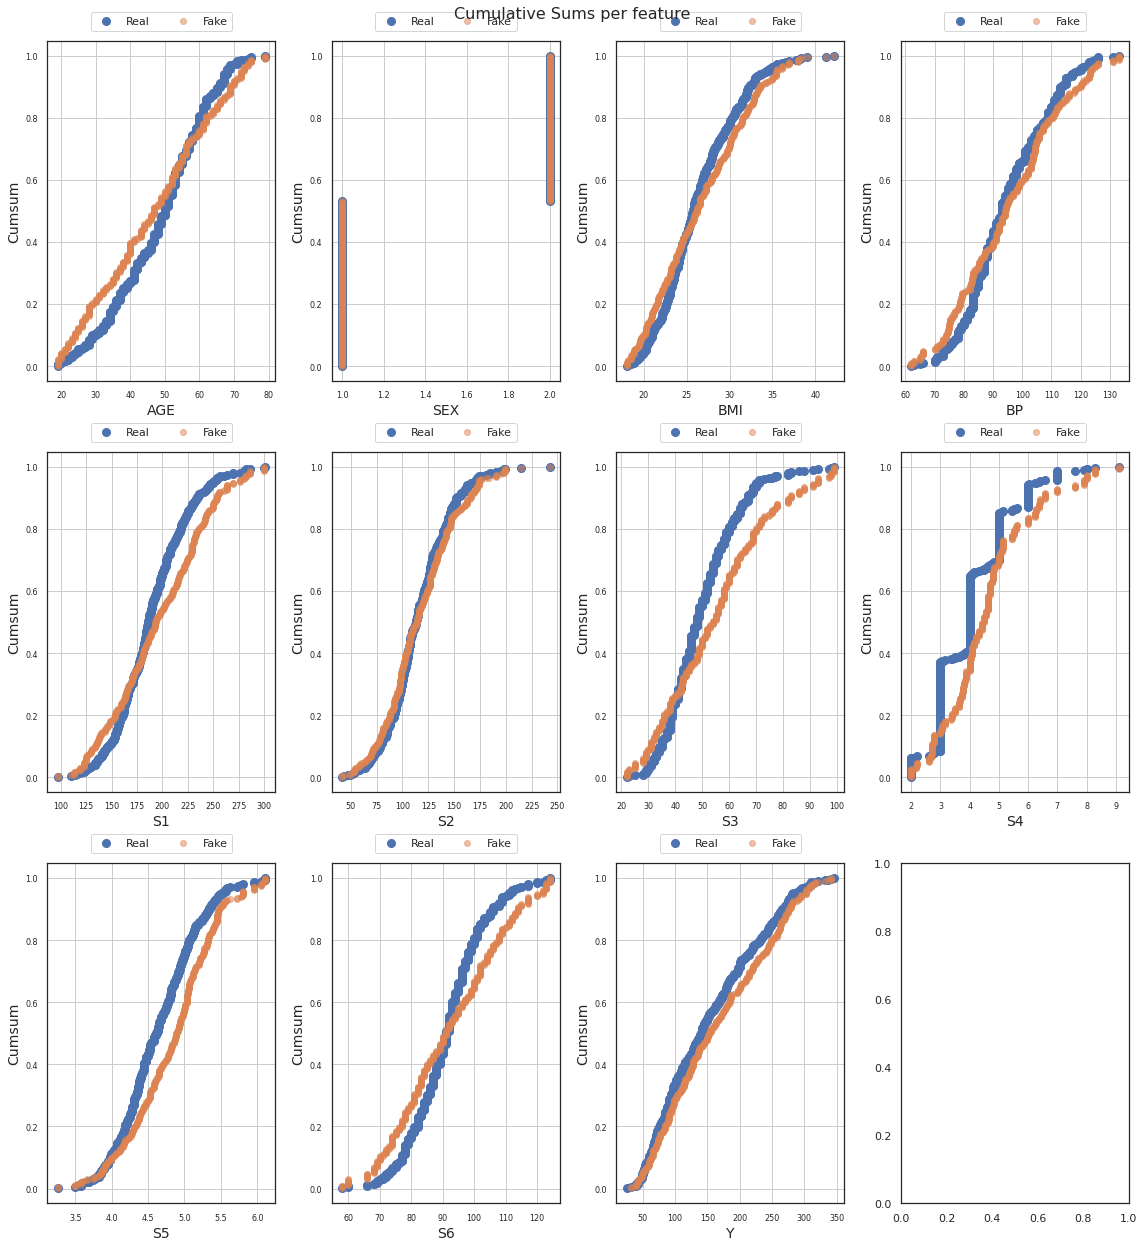

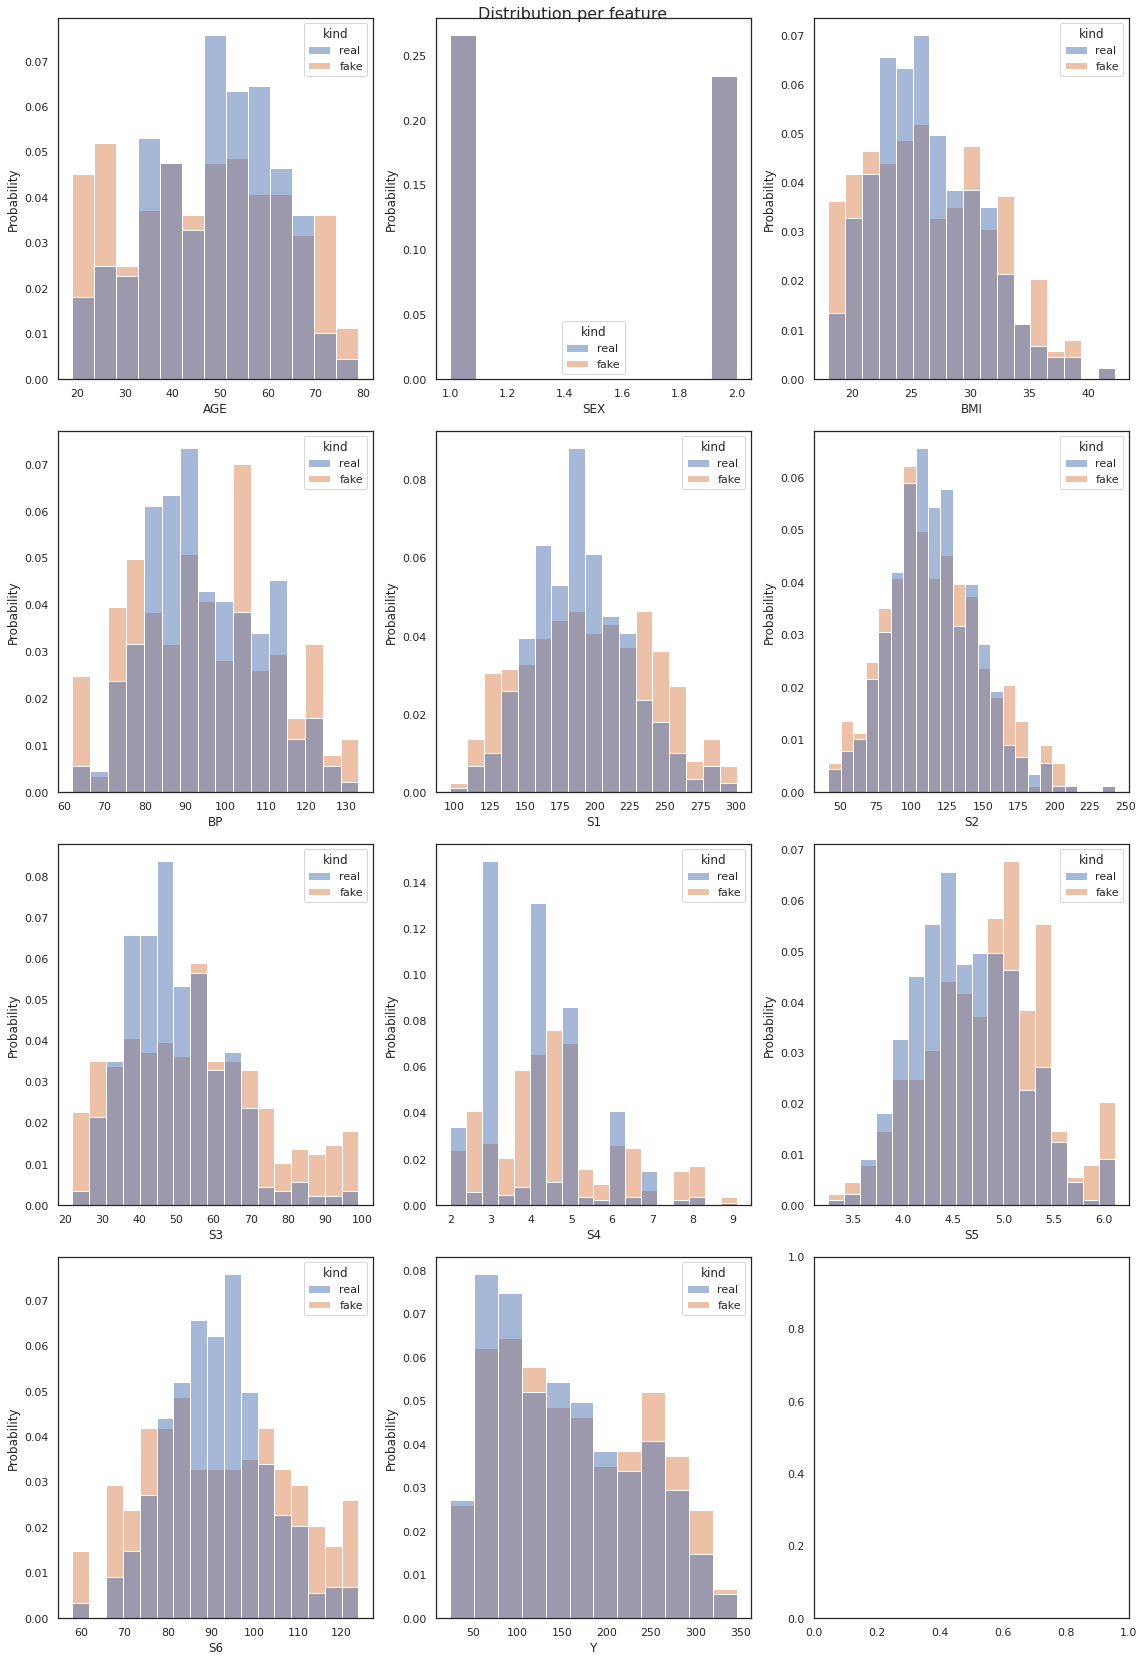

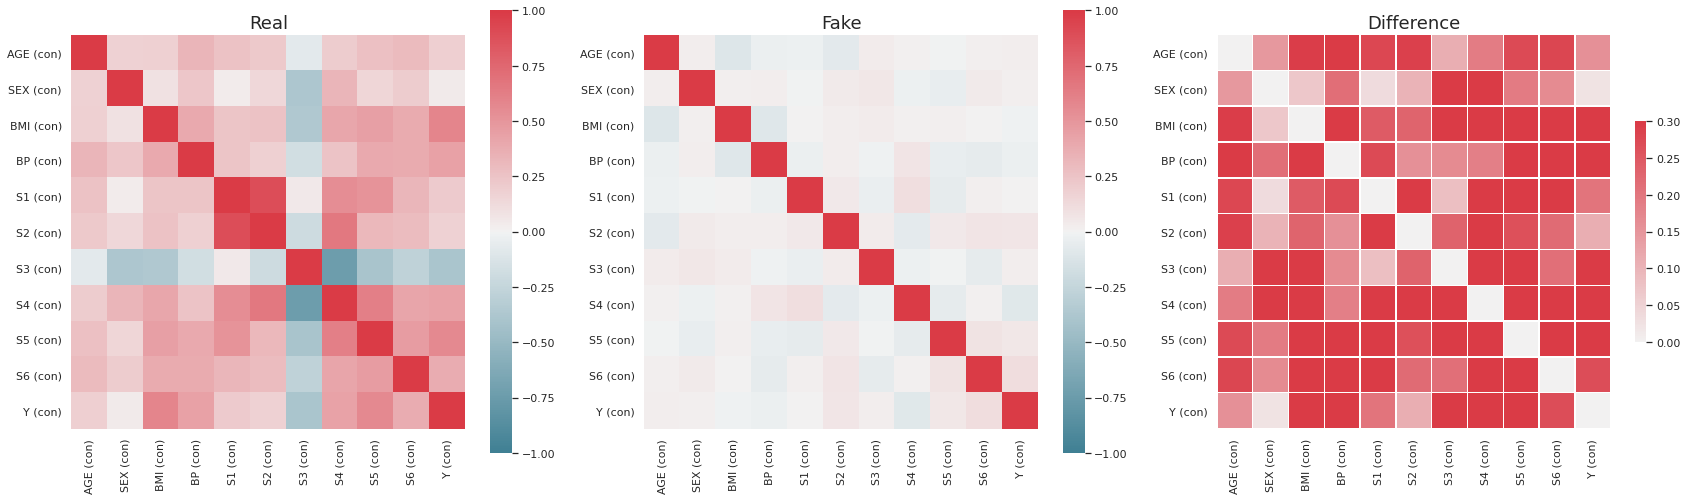

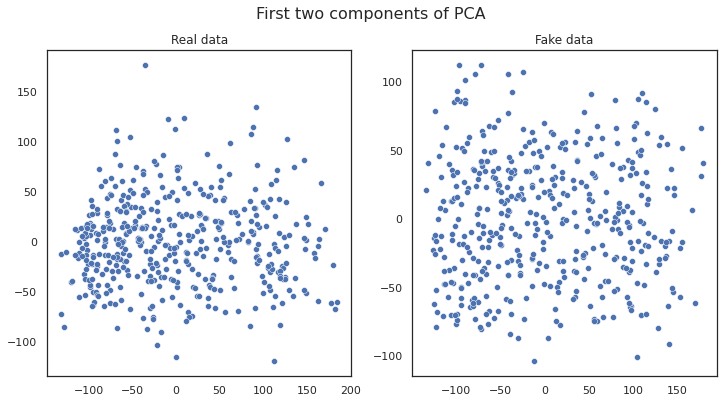

In [ ]:
from table_evaluator import load_data, TableEvaluator
print(real_data.head(5))
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score


X = synthetic_data.drop('Y', axis=1)
y = synthetic_data['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df
print('R Squared Score is:', r2_score(y_test, y_pred))


R Squared Score is: -1.0190062957312667


In [ ]:
data_path = "/content/gdrive/MyDrive/VIP - Synthetic Patient Models and Data-20221105T222810Z-001/VIP - Synthetic Patient Models and Data/cdcbi.csv"
real_data = pd.read_csv(data_path)
print(real_data.head(5))
from ctgan import CTGAN
discrete_columns = ['Diabetes_binary',
                   'HighBP',
                   'HighChol',
                   'CholCheck',
                   'BMI',
                   'Smoker',
                   'Stroke',
                   'HeartDiseaseorAttack',
                   'PhysActivity',
                   'Fruits',
                    'Veggies',
                    'HvyAlcoholConsump',
                    'AnyHealthcare',
                    'NoDocbcCost',
                    'GenHlth',
                    'MentHlth',
                    'PhysHlth',
                    'DiffWalk',
                    'Sex',
                    'Age',
                    'Education',
                    'Income'

                   ]
ctgan = CTGAN(epochs=10)
ctgan.fit(real_data, discrete_columns)
synthetic_data = ctgan.sample(1000)
print(synthetic_data.head(5))




   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored